In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix

from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors

import datetime as dt

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\CAPSTONE PROJECT-1 & 2\WEATHER PREDICTION\GlobalTemperatures.csv')

In [3]:
df.drop(['LandMaxTemperatureUncertainty' , 'LandMinTemperatureUncertainty' , 'LandAndOceanAverageTemperatureUncertainty' , 'LandAverageTemperatureUncertainty'],axis=1, inplace= True)

In [4]:
df['dt']=pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month

In [5]:
df.drop(["dt"],axis=1,inplace=True)

In [7]:
df=df[['Year','month' ,'LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']]

In [8]:
df

Year  month  LandAverageTemperature  LandMaxTemperature  \
0     1750      1                   3.034                 NaN   
1     1750      2                   3.083                 NaN   
2     1750      3                   5.626                 NaN   
3     1750      4                   8.490                 NaN   
4     1750      5                  11.573                 NaN   
...    ...    ...                     ...                 ...   
3187  2015      8                  14.755              20.699   
3188  2015      9                  12.999              18.845   
3189  2015     10                  10.801              16.450   
3190  2015     11                   7.433              12.892   
3191  2015     12                   5.518              10.725   

      LandMinTemperature  LandAndOceanAverageTemperature  
0                    NaN                             NaN  
1                    NaN                             NaN  
2                    NaN                             NaN  
3                    NaN                             NaN  
4                    NaN                             NaN  
...                  ...                             ...  
3187               9.005                          17.589  
3188               7.199                          17.049  
3189               5.232                          16.290  
3190               2.157                          15.252  
3191               0.287                          14.774  

[3192 rows x 6 columns]

# Plotting the average temperature to check if there is any increase in these years

In [9]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = df['Year'].min()
max_year = df['Year'].max()
years = range(min_year, max_year + 1)

df['season'] = df['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = df[df['Year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

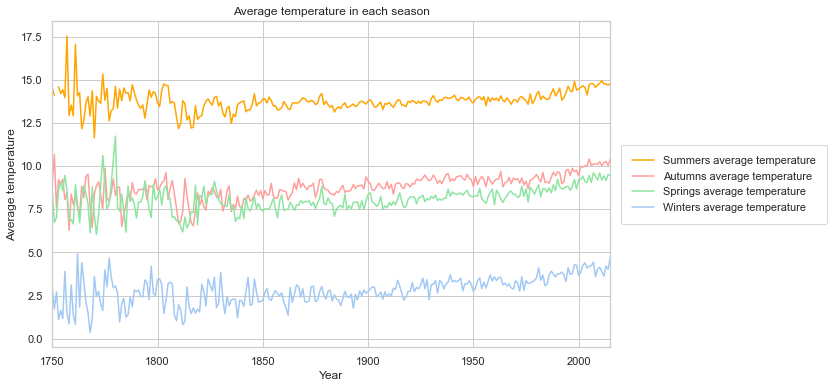

In [10]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

As we can clearly see that , there is a gradual rise in the average temperature during these years

# Countries with the highest temperature differences

In [21]:
temp_by_country = pd.read_csv(r'E:\CAPSTONE PROJECT-1 & 2\WEATHER PREDICTION\GlobalLandTemperaturesByCountry.csv')
countries = temp_by_country['Country'].unique()

In [22]:
countries

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

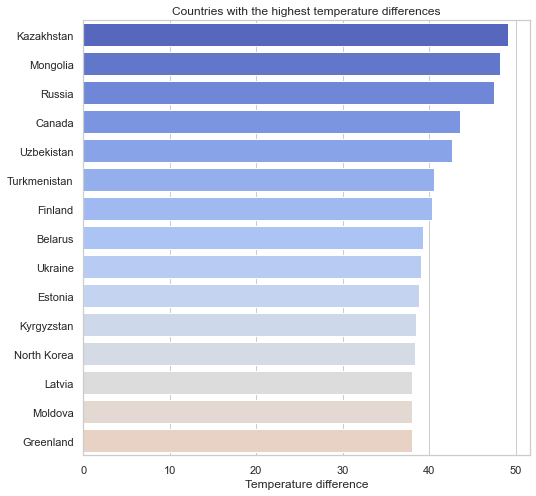

In [23]:
max_min_list = []

# getting max and min temps
for country in countries:
    curr_temps = temp_by_country[temp_by_country['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")

# Plotting average temperature in each countries

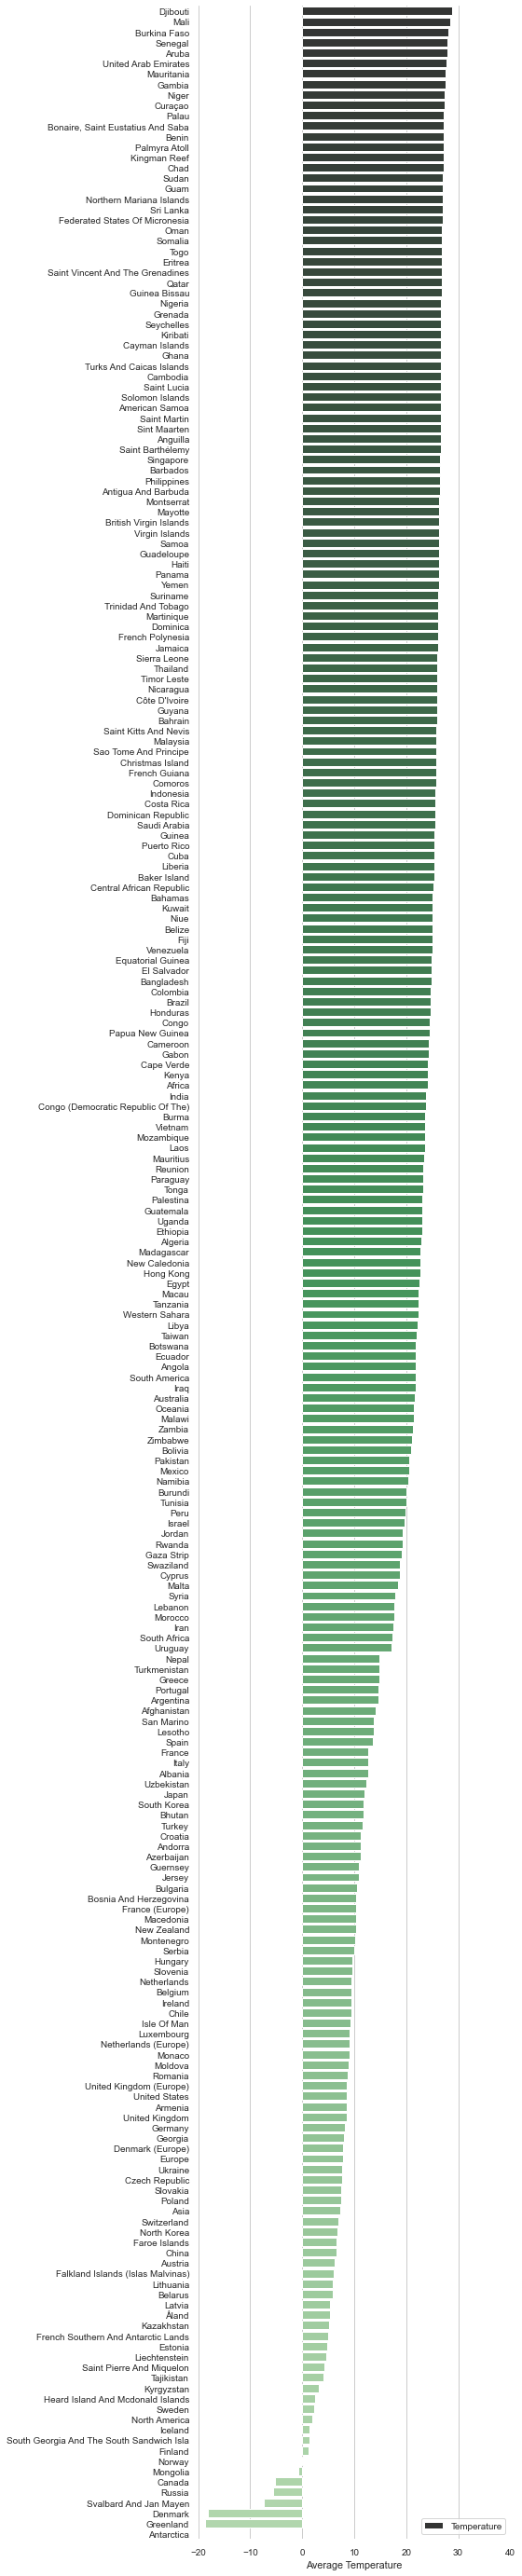

In [27]:
country_temp_asc = temp_by_country.groupby(by = ['Country']).mean().reset_index().sort_values('AverageTemperature',ascending=False).reset_index(drop=True)
sns.set(style="whitegrid",font_scale=0.9)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 50))

# Plot the temperature
sns.set_color_codes("pastel")
sns.barplot(x="AverageTemperature", y="Country", data=country_temp_asc,
            label="Temperature",palette="Greens_d")

# Informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-20, 40), ylabel="",
       xlabel="Average Temperature")
sns.despine(left=True, bottom=True)

# State- wise visualisation to identify states that is having  highest temperature

In [11]:
GlobalTempState = pd.read_csv(r'E:\CAPSTONE PROJECT-1 & 2\WEATHER PREDICTION\GlobalLandTemperaturesByState.csv')

In [12]:
GlobalTempState.Country.unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [38]:
GlobalTempState.State.unique()

array(['Acre', 'Adygey', 'Aga Buryat', 'Alabama', 'Alagoas', 'Alaska',
       'Alberta', 'Altay', 'Amazonas', 'Amur', 'Andaman And Nicobar',
       'Andhra Pradesh', 'Anhui', 'Arizona', 'Arkansas', "Arkhangel'Sk",
       'Arunachal Pradesh', 'Assam', "Astrakhan'",
       'Australian Capital Territory', 'Bahia', 'Bashkortostan',
       'Beijing', 'Belgorod', 'Bihar', 'British Columbia', 'Bryansk',
       'Buryat', 'California', 'Chandigarh', 'Chechnya', 'Chelyabinsk',
       'Chhattisgarh', 'Chita', 'Chongqing', 'Chukot', 'Chuvash',
       'City Of St. Petersburg', 'Colorado', 'Connecticut',
       'Dadra And Nagar Haveli', 'Dagestan', 'Daman And Diu', 'Delaware',
       'Delhi', 'District Of Columbia', 'Distrito Federal', 'Evenk',
       'Florida', 'Fujian', 'Gansu', 'Georgia (State)', 'Goa',
       'Gorno Altay', 'Guangdong', 'Guangxi', 'Guizhou', 'Gujarat',
       'Hainan', 'Haryana', 'Hawaii', 'Hebei', 'Heilongjiang', 'Henan',
       'Himachal Pradesh', 'Hubei', 'Hunan', 'Idaho', 'I

In [13]:
GlobalTempState.State.nunique()

241

There are 7 countries and 241 states in dataset.

In [14]:
country_temp_asc = GlobalTempState.groupby(by=['Country']).mean().reset_index().sort_values('AverageTemperature',ascending=False).reset_index(drop=True)
country_temp_asc
plt.figure(figsize=(20,10))

fig = px.bar(country_temp_asc, x='Country', y='AverageTemperature',color='AverageTemperature')

fig.update_layout(
        title="Average Temperature of Countries Over 270 Years ",
        xaxis_title="Years",
        yaxis_title="Average Temperature",
        font=dict(
            family="Courier New",
            size=18,
            color="black"
        )
    )
fig.show()

<Figure size 1440x720 with 0 Axes>

In [15]:
country_state_temp = GlobalTempState.groupby(by = ['Country','State']).mean().reset_index().sort_values('AverageTemperature',ascending=False).reset_index()
country_state_temp
country_state_temp["world"] = "world" # in order to have a single root node
figg= px.treemap(country_state_temp.head(200), path=['world', 'Country','State'], values='AverageTemperature',
                  color='State',color_continuous_scale='RdBu')
figg.show()

The state wise average temperature in ascendinging order(bottom to top)

# TIME FOR ML MODEL DEPLOYEMENT

In [54]:
df.head(5)

Year  month  LandAverageTemperature  LandMaxTemperature  \
0  1750      1                   3.034                 NaN   
1  1750      2                   3.083                 NaN   
2  1750      3                   5.626                 NaN   
3  1750      4                   8.490                 NaN   
4  1750      5                  11.573                 NaN   

   LandMinTemperature  LandAndOceanAverageTemperature  season  
0                 NaN                             NaN  winter  
1                 NaN                             NaN  winter  
2                 NaN                             NaN  spring  
3                 NaN                             NaN  spring  
4                 NaN                             NaN  spring

In [55]:
df.shape

(3192, 7)

In [56]:
df.dtypes

Year                                int64
month                               int64
LandAverageTemperature            float64
LandMaxTemperature                float64
LandMinTemperature                float64
LandAndOceanAverageTemperature    float64
season                             object
dtype: object

In [57]:
df.isnull().sum()

Year                                 0
month                                0
LandAverageTemperature              12
LandMaxTemperature                1200
LandMinTemperature                1200
LandAndOceanAverageTemperature    1200
season                               0
dtype: int64

In [58]:
df=df[df.Year>=1850]

df=df.dropna()

df=df.set_index(['Year'])

df

month  LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                          
1850      1                   0.749               8.242              -3.206   
1850      2                   3.071               9.970              -2.291   
1850      3                   4.954              10.347              -1.905   
1850      4                   7.217              12.934               1.018   
1850      5                  10.004              15.655               3.811   
...     ...                     ...                 ...                 ...   
2015      8                  14.755              20.699               9.005   
2015      9                  12.999              18.845               7.199   
2015     10                  10.801              16.450               5.232   
2015     11                   7.433              12.892               2.157   
2015     12                   5.518              10.725               0.287   

      LandAndOceanAverageTemperature  season  
Year                                          
1850                          12.833  winter  
1850                          13.588  winter  
1850                          14.043  spring  
1850                          14.667  spring  
1850                          15.507  spring  
...                              ...     ...  
2015                          17.589  summer  
2015                          17.049  autumn  
2015                          16.290  autumn  
2015                          15.252  autumn  
2015                          14.774  winter  

[1992 rows x 6 columns]

In [60]:
df.drop(['month','season'],axis=1,inplace=True)

In [61]:
df

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                   0.749               8.242              -3.206   
1850                   3.071               9.970              -2.291   
1850                   4.954              10.347              -1.905   
1850                   7.217              12.934               1.018   
1850                  10.004              15.655               3.811   
...                      ...                 ...                 ...   
2015                  14.755              20.699               9.005   
2015                  12.999              18.845               7.199   
2015                  10.801              16.450               5.232   
2015                   7.433              12.892               2.157   
2015                   5.518              10.725               0.287   

      LandAndOceanAverageTemperature  
Year                                  
1850                          12.833  
1850                          13.588  
1850                          14.043  
1850                          14.667  
1850                          15.507  
...                              ...  
2015                          17.589  
2015                          17.049  
2015                          16.290  
2015                          15.252  
2015                          14.774  

[1992 rows x 4 columns]

In [62]:
df.isnull().sum()

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

# Correlation Visualization

One thing I like to do when working with regression problems is to look at the cleaned dataframe and to see if we can truly use one column as our target and the others as our features. One way I loosely determine that is by plotting a correlation matrix, just to get an understanding of how related each column is to each other:

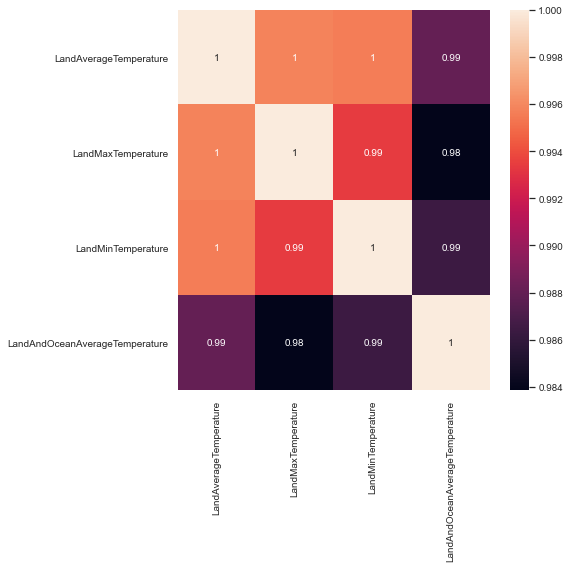

In [63]:
plt.figure(figsize=(7,7))
Corr_matrix=df.corr()
sns.heatmap(Corr_matrix , annot=True )

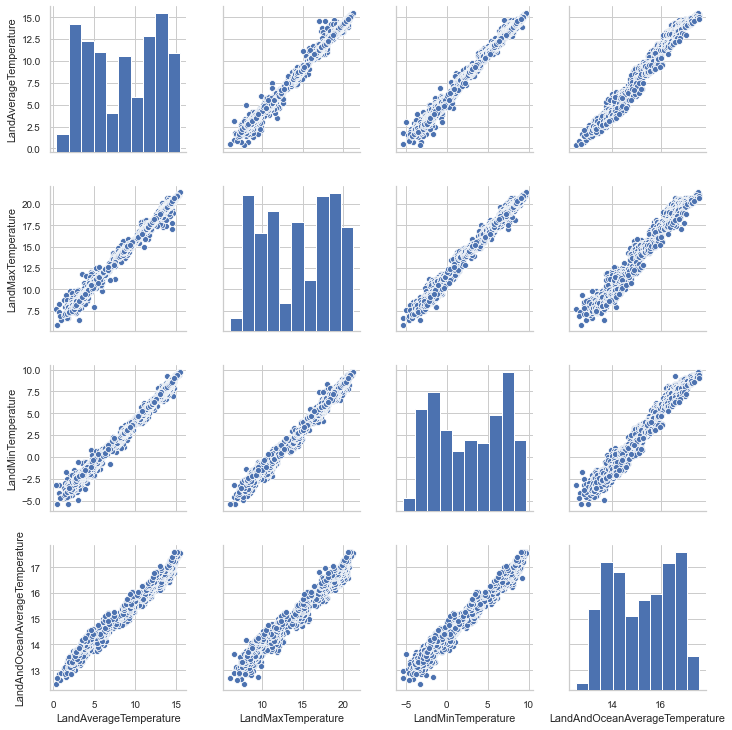

In [64]:
sns.pairplot(df)

The columns we chose to keep moving forward are HIGHLY correlated to one another. So we should have pretty strong & positive predictions just from glancing at this plot.

# Train - Test Split

In [65]:
#creating x and y (independent and dependent variables)

x=df.iloc[:, :-1].values

y=df.iloc[:, -1].values

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [68]:
y_pred = clf.predict(x_test)

In [69]:
#to see the predicted values and the real test value

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16.19 16.39]
 [15.26 15.44]
 [13.41 13.26]
 [13.53 13.26]
 [15.55 15.56]
 [16.21 15.93]
 [15.52 15.88]
 [13.88 14.16]
 [16.16 16.14]
 [16.97 16.83]
 [17.01 17.33]
 [14.89 14.92]
 [14.63 14.52]
 [16.71 16.73]
 [16.89 17.03]
 [16.66 16.68]
 [13.8  13.69]
 [16.1  15.83]
 [16.12 15.8 ]
 [13.15 13.19]
 [14.68 15.08]
 [13.74 13.95]
 [13.51 13.58]
 [16.97 16.94]
 [14.98 14.87]
 [13.63 13.58]
 [14.59 14.13]
 [15.95 15.88]
 [16.27 16.29]
 [13.19 12.96]
 [16.31 16.43]
 [16.1  15.92]
 [16.37 16.47]
 [15.33 15.59]
 [16.87 16.62]
 [16.65 16.62]
 [14.6  14.47]
 [16.59 16.46]
 [16.79 16.65]
 [16.16 15.85]
 [14.85 14.79]
 [16.92 17.05]
 [15.23 15.44]
 [16.6  16.5 ]
 [15.32 15.09]
 [13.97 14.15]
 [16.12 16.  ]
 [13.62 13.76]
 [16.59 16.22]
 [16.01 16.21]
 [16.89 16.72]
 [13.27 13.35]
 [15.7  15.81]
 [14.25 14.44]
 [13.63 13.68]
 [13.28 13.31]
 [14.68 14.54]
 [13.68 13.55]
 [13.71 13.9 ]
 [16.98 17.39]
 [16.7  16.66]
 [15.9  15.71]
 [14.79 14.88]
 [16.83 16.55]
 [13.4  13.32]
 [16.52 16.29]
 [15.18 15

In [70]:
clf.score(x_test,y_test)

0.9776068697702667

accuracy of Linear Regression model is 0.9776068697702667

# Random Forest Regressor Model

In [71]:
#training the model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 10, random_state = 0)
clf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [72]:
clf.score(x_test,y_test)

0.9784901794596544

accuracy of Random Forest Regressor Model is 0.9784901794596544

# Support Vector Regression (SVR)

In [74]:
y = y.reshape(len(y),1)

In [75]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [76]:
print(x)

[[-1.84 -1.42 -1.43]
 [-1.29 -1.02 -1.21]
 [-0.85 -0.93 -1.12]
 ...
 [ 0.52  0.49  0.6 ]
 [-0.27 -0.34 -0.14]
 [-0.72 -0.84 -0.59]]


In [77]:
print(y)

[[-1.87]
 [-1.28]
 [-0.92]
 ...
 [ 0.85]
 [ 0.03]
 [-0.34]]


training the SVR model on the whole dataset

In [78]:
from sklearn.svm import SVR
clf = SVR(kernel = 'rbf')
clf.fit(x_train, y_train)

SVR()

In [79]:
#checking the accuracy of the model

clf.score(x_test,y_test)

0.9791537279008853

accuracy of Support Vector Regression (SVR) is 0.9791537279008853